In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from kohonen import Kohonen
from oja import Oja
from sklearn.decomposition import PCA

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1,1,1,1))

In [52]:
 #loading data
dataset = pd.read_csv('europe.csv')

#le sacamos el nombre de los paises
countries = dataset.iloc[:,0]
variable_names = dataset.iloc[:,1:].columns
variables = dataset.iloc[:, 1:].values



standarized = (variables - variables.mean(axis=0))/variables.std(axis=0)

In [53]:
def plot_variables(variable_names, axis):
    plt.barh([i for i in range(len(axis))], axis)
    plt.yticks([i for i in range(len(axis))], variable_names)
    plt.xlabel("PC1")


In [54]:
def plot_index(countries, components):
    data = [ (name, component) for name, component in zip(countries, components)]
    sorted_data = sorted(data, key=lambda x: x[1])
    X = [x[1] for x in sorted_data]
    Y = [x[0] for x in sorted_data]
    plt.barh([i for i in range(len(sorted_data))], X)
    plt.yticks([i for i in range(len(sorted_data))],Y)
    #plt.xticks([np.arange(min(X), max(X), 10)])
    plt.xlabel("PC1")

In [55]:
pca = PCA()
components = pca.fit_transform(standarized)
axis = pca.components_[0]

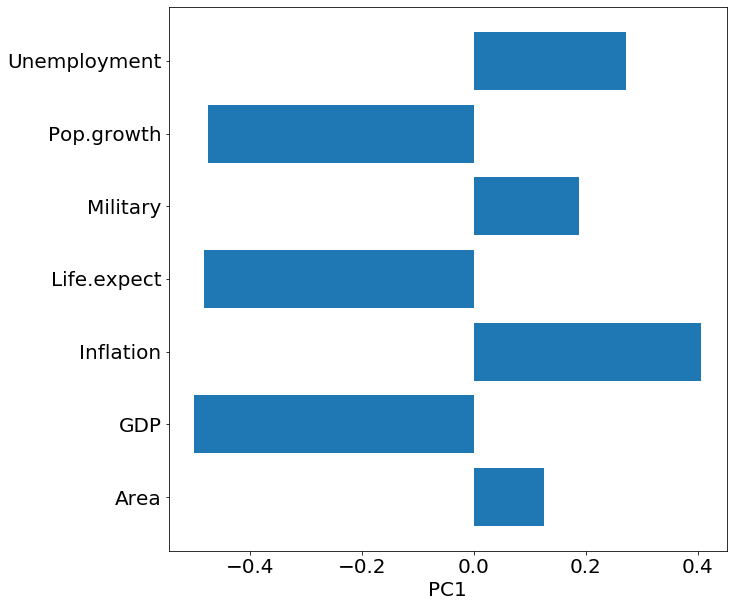

In [56]:
plt.figure("Barh pca")
plot_variables(variable_names, axis)

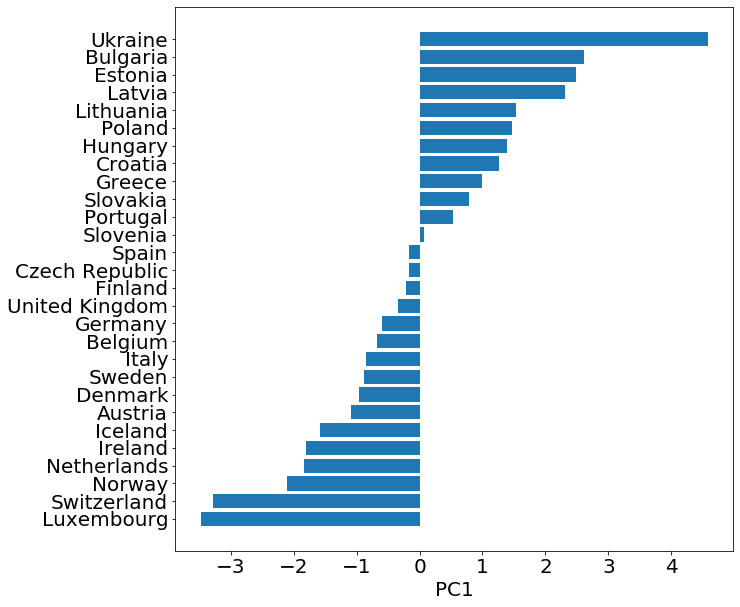

In [57]:

plt.figure("index pca")
plot_index(countries, components[:,0])

In [58]:
euclidian_error = []
angle_error = []
def callback(network):
    pc = network.weights
    euclidian_error.append(np.linalg.norm(pc - axis))
    angle_error.append(np.arccos(np.dot(pc, axis)/(np.linalg.norm(pc)*np.linalg.norm(axis))))


In [59]:
network = Oja(standarized, seed=17)

network.train(epochs=2000, lr = 1e-4, callback=callback)

components = [network.predict(c) for c in standarized]

axis = np.diag(np.ones(standarized.shape[1]))

axis = [network.predict(ax) for ax in axis]

Angle error: 7.31e-02
Euclidian error: 7.57e-02


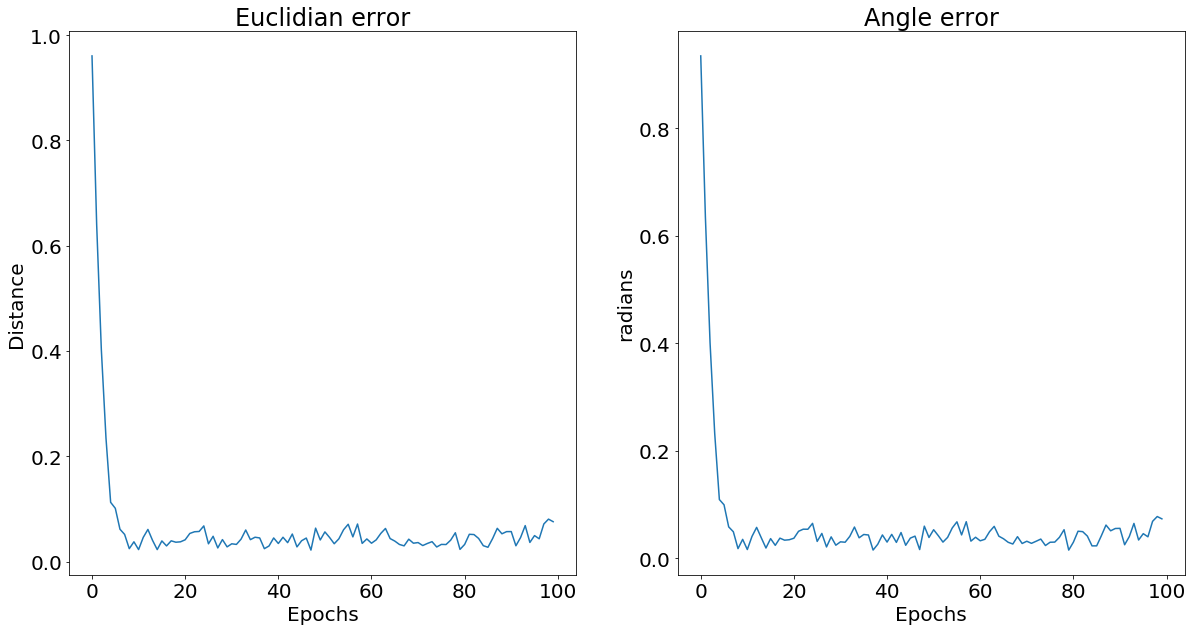

In [60]:
fig,ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(euclidian_error)
ax[0].set_title("Euclidian error")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Distance")
#ax[0].set_yscale("log")
ax[1].plot(angle_error)
ax[1].set_title("Angle error")
ax[1].set_ylabel("radians")
ax[1].set_xlabel("Epochs")
#ax[1].set_yscale("log")
print("Angle error: {:.2e}".format(angle_error[-1]))
print("Euclidian error: {:.2e}".format(euclidian_error[-1]))
plt.show()

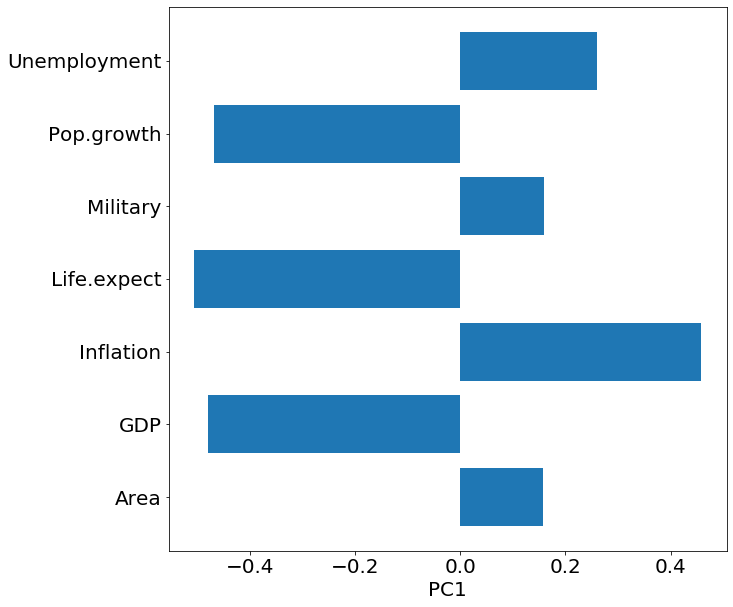

In [61]:
plt.figure("Barh oja")
plot_variables(variable_names, axis)

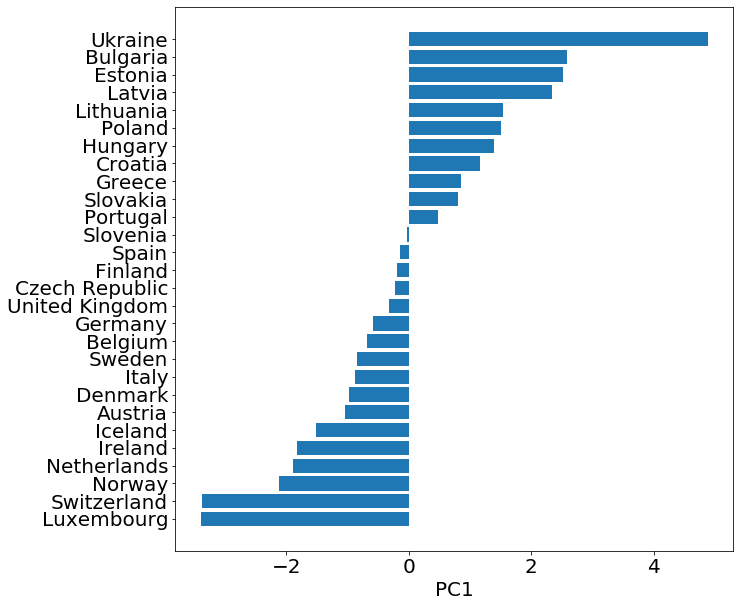

In [62]:
plt.figure("index oja")
plot_index(countries, components)